<a href="https://colab.research.google.com/github/salmahzakiah/data_science/blob/main/Final_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

import warnings
warnings.filterwarnings("ignore")

In [5]:
#load dataset
data=pd.read_csv('loan_data_2007_2014.csv')

In [6]:
# Melihat total baris dan kolom
data.shape

(65490, 75)

In [7]:
# Membaca csv file dan melihat 5 baris pertama
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


pemeriksaan setiap baris dalam data mewakili satu individu

In [8]:
#pengecekan jumlah nilai unik pada kolom id dan jumlah nilai unik pada kolom yang menunjukan identitas individu (member_id)
jumlah_baris = data['id'].nunique()
jumlah_unik = data['member_id'].nunique()

#cek apakah setiap baris mewakili satu individu
if jumlah_baris == jumlah_unik:
    print("Setiap baris mewakili satu individu.")
else:
    print("Tidak setiap baris mewakili satu individu.")

Setiap baris mewakili satu individu.


# **Data Understanding**

In [9]:
# Melihat info seluruh kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65490 entries, 0 to 65489
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   65490 non-null  int64  
 1   id                           65490 non-null  int64  
 2   member_id                    65490 non-null  int64  
 3   loan_amnt                    65490 non-null  int64  
 4   funded_amnt                  65490 non-null  int64  
 5   funded_amnt_inv              65490 non-null  float64
 6   term                         65490 non-null  object 
 7   int_rate                     65490 non-null  float64
 8   installment                  65490 non-null  float64
 9   grade                        65490 non-null  object 
 10  sub_grade                    65490 non-null  object 
 11  emp_title                    61301 non-null  object 
 12  emp_length                   63328 non-null  object 
 13  home_ownership  

# **Features Engineering**

In [10]:
#drop kolom yang tidak digunakan
cols_to_drop = [
    # unique id
    "Unnamed: 0", "id", "member_id",

    # free text
    "url", "desc",

    # all null / constant / others
    "zip_code", "annual_inc_joint", "dti_joint", "verification_status_joint",
    "open_acc_6m", "open_il_6m", "open_il_12m", "open_il_24m",
    "mths_since_rcnt_il", "total_bal_il", "il_util", "open_rv_12m",
    "open_rv_24m", "max_bal_bc", "all_util", "inq_fi", "total_cu_tl",
    "inq_last_12m", "mths_since_last_major_derog", "tot_coll_amt",
    "tot_cur_bal", "total_rev_hi_lim",

    # expert judgment
    "sub_grade"
]


In [11]:
#menghapus kolom yang terdaftar dalam cols_to_drop
data.drop(columns=cols_to_drop,axis=1, inplace=True)

#dataset setelah penghapusan kolom
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65490 entries, 0 to 65489
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   65490 non-null  int64  
 1   funded_amnt                 65490 non-null  int64  
 2   funded_amnt_inv             65490 non-null  float64
 3   term                        65490 non-null  object 
 4   int_rate                    65490 non-null  float64
 5   installment                 65490 non-null  float64
 6   grade                       65490 non-null  object 
 7   emp_title                   61301 non-null  object 
 8   emp_length                  63328 non-null  object 
 9   home_ownership              65490 non-null  object 
 10  annual_inc                  65486 non-null  float64
 11  verification_status         65490 non-null  object 
 12  issue_d                     65490 non-null  object 
 13  loan_status                 654

Defining Target Variable(Variable Defendent)

In [12]:
#persentase dalam setiap kolom 'loan_status'
persentase_loan_status = data['loan_status'].value_counts(normalize=True) * 100
print(persentase_loan_status)

loan_status
Fully Paid                                             61.623149
Current                                                21.461292
Charged Off                                            11.563597
Does not meet the credit policy. Status:Fully Paid      3.035578
Does not meet the credit policy. Status:Charged Off     1.162009
Late (31-120 days)                                      0.668804
In Grace Period                                         0.302336
Late (16-30 days)                                       0.111467
Default                                                 0.071767
Name: proportion, dtype: float64


In [13]:
#Daftar status pembayaran yang dianggap sebagai 'bad_status'
bad_status = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']

#menambahkan kolom 'bad_flag' yang menandai pembayaran dalam 'bad_status'
data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [14]:
#persentase nilai dalam kolom'bad_flag'
persentase_bad_flag = data['bad_flag'].value_counts(normalize=True) * 100
print(persentase_bad_flag)

bad_flag
0    86.533822
1    13.466178
Name: proportion, dtype: float64


In [15]:
#menghapus kolom asli 'load_status'
data.drop(columns='loan_status', axis=1, inplace=True)

# **Data Cleaning**

Column term

In [16]:
#menampilkan nilai unik dari kolom 'term'
unique_term = data['term'].unique()
print(unique_term)

[' 36 months' ' 60 months']


In [17]:
#menghapus teks tambahan dan mengubah tipe data menjadi float
data['term_int'] = data['term'].str.replace(' months', '').astype(float)

In [18]:
#menghapus kolom asli 'term'
data.drop(columns='term', axis=1, inplace=True)

Column earlist_cr_line

In [19]:
#3 baris pertama dalam kolom 'earlist_cr_line'
print(data['earliest_cr_line'].head(3))

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object


In [20]:
#mengkonversi 'earlist_cr_line' menjadi format tanggal
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
print(data['earliest_cr_line_date'].head(3))

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]


In [21]:
#menghitung jumlah bulan sejak 'earlist_cr_line'hingga tanggal referensi
data['mths_since_earliest_cr_line'] = round(((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']).dt.days)/30.4375)
print(data['mths_since_earliest_cr_line'].head(3))

0    395.0
1    224.0
2    193.0
Name: mths_since_earliest_cr_line, dtype: float64


In [22]:
#statistik deskriptif
print(data['mths_since_earliest_cr_line'].describe())

count    65461.000000
mean       244.967706
std         91.883826
min       -612.000000
25%        191.000000
50%        231.000000
75%        288.000000
max        587.000000
Name: mths_since_earliest_cr_line, dtype: float64


In [23]:
#menampilkan baris dengan nilai kurang dari 0
print(data[data['mths_since_earliest_cr_line'] < 0][['earliest_cr_line','earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3))

     earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580           Sep-62            2062-09-01                       -537.0
1770           Sep-68            2068-09-01                       -609.0
2799           Sep-64            2064-09-01                       -561.0


In [24]:
#mengganti 'mths_since_earliest_cr_line' yang kurang dari 0 dengan nilai max
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [25]:
data.drop(columns=['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

Column Issue_d

In [26]:
#mengkonversi menjadi fromat tanggal
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')

In [27]:
#menghitung jumlah bulan hingga referensi
data['mths_since_issue_d'] = round(((pd.to_datetime('2017-12-01') - data['issue_d_date']).dt.days)/30.4375)

In [28]:
#statistik deskriptif
print(data['mths_since_issue_d'].describe())

count    65490.000000
mean        72.861994
std         20.475660
min         48.000000
25%         49.000000
50%         76.000000
75%         87.000000
max        126.000000
Name: mths_since_issue_d, dtype: float64


In [29]:
data.drop(columns=['issue_d', 'issue_d_date'], axis=1, inplace=True)

Column lays_pymnt_d

In [30]:
#konversi menjadi format tanggal
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')

In [31]:
#jumlah bulan hingga tanggal referensi
data['mths_since_last_pymnt_d'] = round(((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']).dt.days)/30.4375)

In [32]:
#statistik deskriptif
print(data['mths_since_last_pymnt_d'].describe())

count    65399.000000
mean        47.112249
std         20.970047
min         23.000000
25%         26.000000
50%         44.000000
75%         62.000000
max        120.000000
Name: mths_since_last_pymnt_d, dtype: float64


In [33]:
data.drop(columns=['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

Column next_pymnt_d

In [34]:
#konversi menjadi format tanggal
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')

In [35]:
#jumlah bulan hingga tanggal referensi
data['mths_since_next_pymnt_d'] = round(((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']).dt.days)/30.4375)

In [36]:
#statistik deskriptif
print(data['mths_since_next_pymnt_d'].describe())

count    17560.000000
mean        30.593793
std         20.875593
min         21.000000
25%         22.000000
50%         22.000000
75%         23.000000
max        120.000000
Name: mths_since_next_pymnt_d, dtype: float64


In [37]:
data.drop(columns=['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

Column last_credit_pull_d

In [38]:
#konversi ke format tanggal
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')

In [39]:
#jumlah bulan hingga tanggal referensi
data['mths_since_last_credit_pull_d'] = round(((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']).dt.days)/30.4375)

In [40]:
#statistik deskriptif
print(data['mths_since_last_credit_pull_d'].describe())

count    65486.000000
mean        36.011896
std         18.473227
min         23.000000
25%         23.000000
50%         25.000000
75%         45.000000
max        127.000000
Name: mths_since_last_credit_pull_d, dtype: float64


In [41]:
data.drop(columns=['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# **Exploratory Data Analyst**

**Check Colerration**

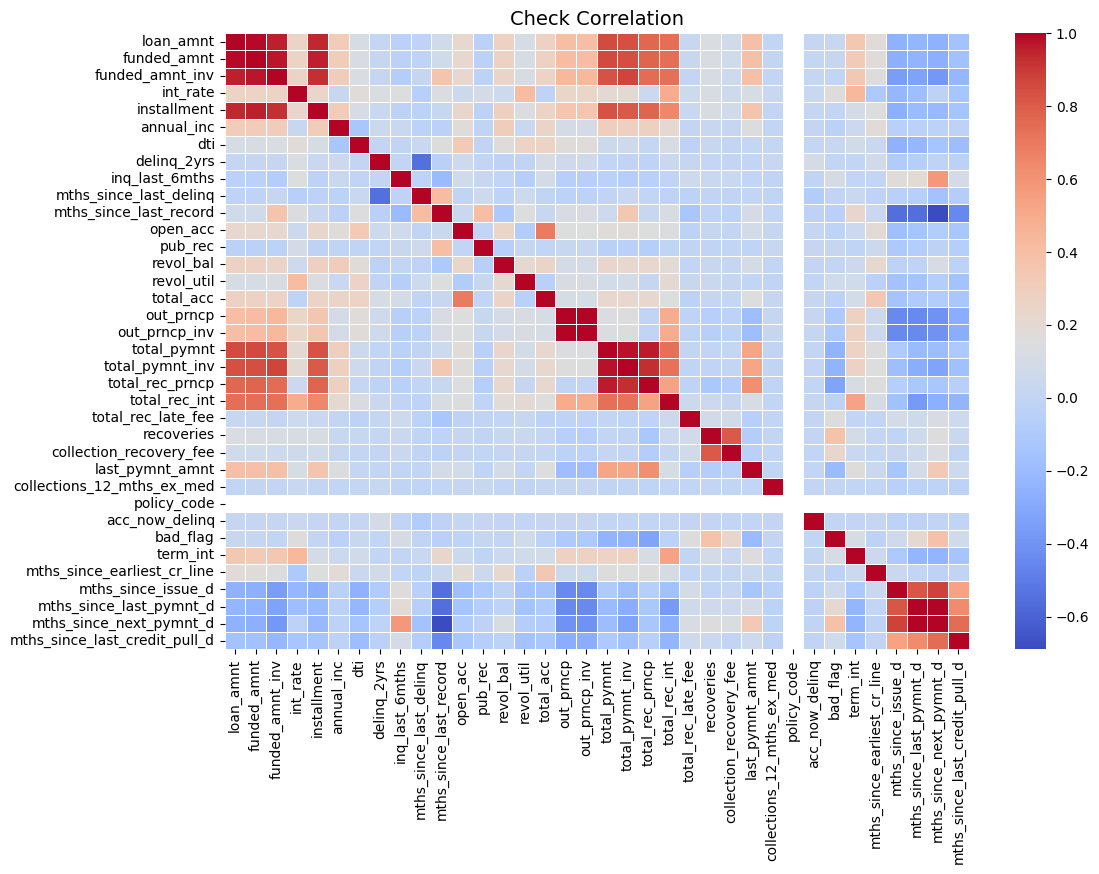

In [42]:
# Menghitung matriks korelasi
corr_matrix = data.select_dtypes(include=np.number).corr() # Changed 'df' to 'data'

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Judul
plt.title("Check Correlation", fontsize=14)

# Tampilkan plot
plt.show()

Caterogical Data

In [43]:
#jumlah nilai unik
print(data.select_dtypes(include='object').nunique())

grade                      7
emp_title              41924
emp_length                11
home_ownership             5
verification_status        3
pymnt_plan                 2
purpose                   14
title                  26435
addr_state                50
initial_list_status        2
application_type           1
dtype: int64


In [44]:
data.drop(['emp_title','title','application_type'], axis=1, inplace=True)

Numerical Data

In [45]:
#nilai unik tipe data non-object
print(data.select_dtypes(exclude='object').nunique())

loan_amnt                         1018
funded_amnt                       1112
funded_amnt_inv                   9341
int_rate                           428
installment                      21746
annual_inc                        7313
dti                               3445
delinq_2yrs                         15
inq_last_6mths                      28
mths_since_last_delinq             102
mths_since_last_record             122
open_acc                            46
pub_rec                             11
revol_bal                        29333
revol_util                        1143
total_acc                           85
out_prncp                        13224
out_prncp_inv                    13296
total_pymnt                      63267
total_pymnt_inv                  62805
total_rec_prncp                  23416
total_rec_int                    59316
total_rec_late_fee                2450
recoveries                        5475
collection_recovery_fee           3797
last_pymnt_amnt          

In [46]:
data.drop(['policy_code'], axis=1, inplace=True)

In [47]:
#loop melalui setiap fitur dengan tipe data objek
for col in data.select_dtypes(include='object').columns.tolist():
  #distribusi nilai unik dari setiap fitur
  print("Distribusi nilai unik untuk fitur", col)
  print(data[col].value_counts(normalize=True)*100)
  print("\n")

Distribusi nilai unik untuk fitur grade
grade
B    29.679340
C    22.693541
A    21.247519
D    14.918308
E     7.651550
F     2.832494
G     0.977248
Name: proportion, dtype: float64


Distribusi nilai unik untuk fitur emp_length
emp_length
10+ years    27.150707
< 1 year     10.695111
2 years      10.505622
3 years       9.763454
5 years       7.846450
1 year        7.800657
4 years       7.516422
6 years       5.842597
7 years       5.117799
8 years       4.249305
9 years       3.511875
Name: proportion, dtype: float64


Distribusi nilai unik untuk fitur home_ownership
home_ownership
MORTGAGE    47.683616
RENT        43.960910
OWN          8.135593
OTHER        0.207665
NONE         0.012216
Name: proportion, dtype: float64


Distribusi nilai unik untuk fitur verification_status
verification_status
Not Verified       37.416399
Verified           35.435944
Source Verified    27.147656
Name: proportion, dtype: float64


Distribusi nilai unik untuk fitur pymnt_plan
pymnt_plan
n    99.9

In [48]:
data.drop(columns='pymnt_plan', axis=1, inplace=True)

**Univariate Analysis**

Categorial Data

Index(['grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')


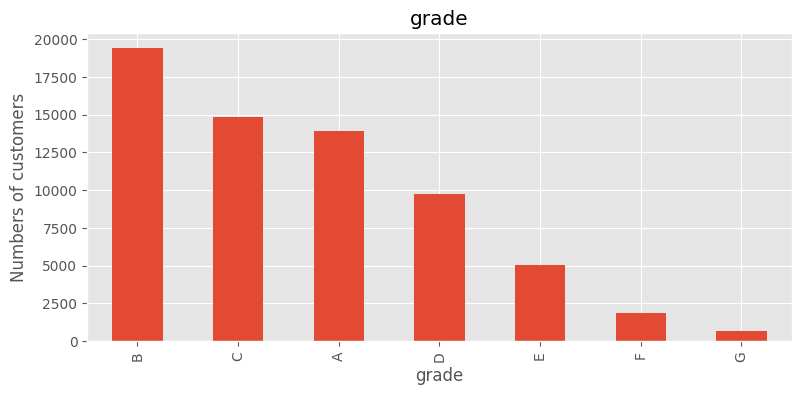

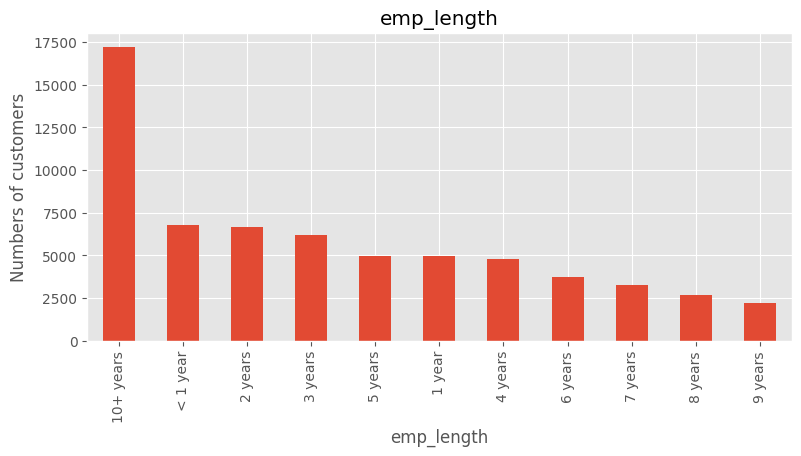

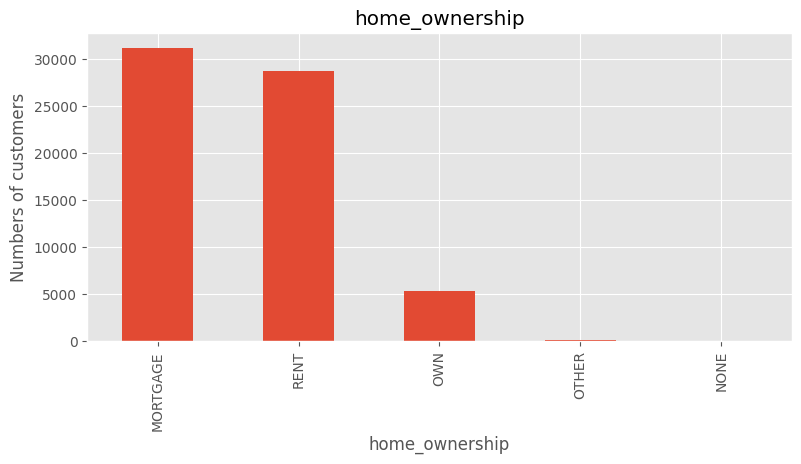

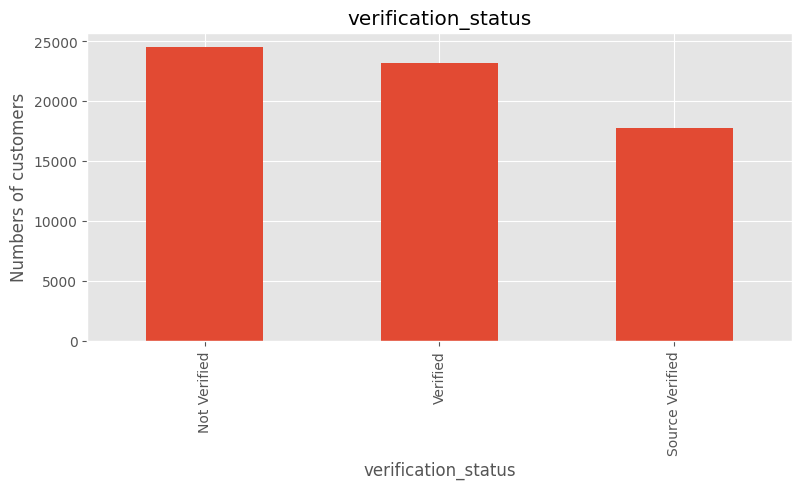

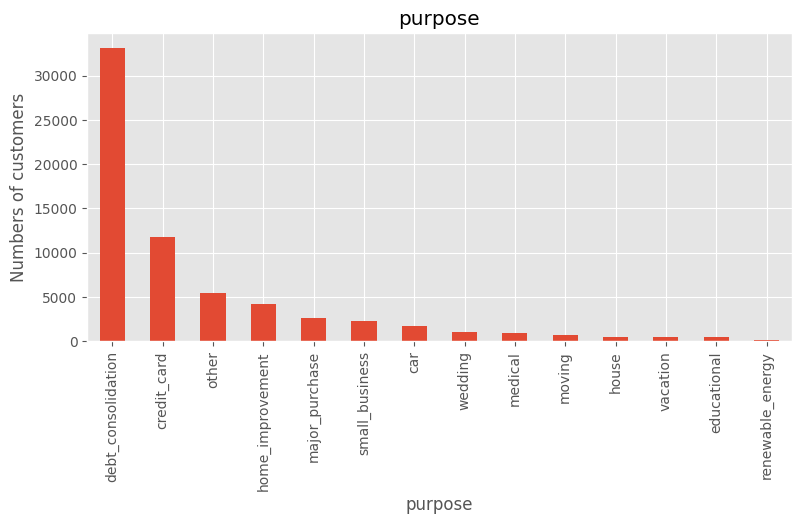

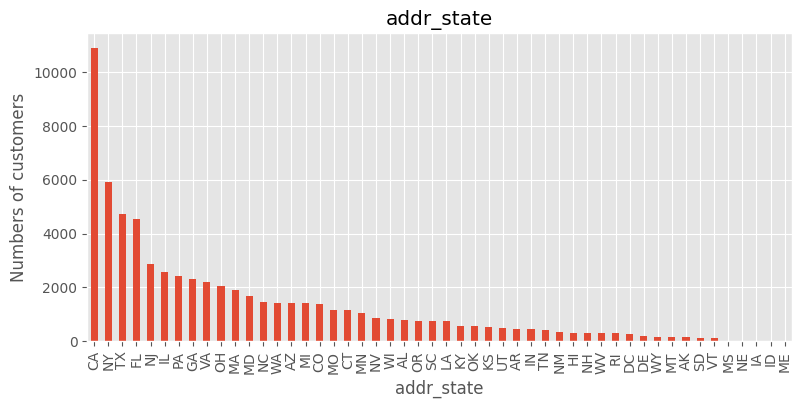

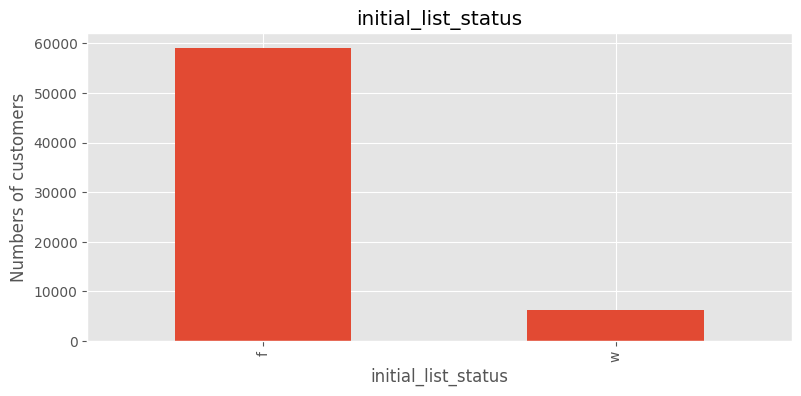

In [49]:
cat_var= data.select_dtypes(include='object').columns
print(cat_var)

#plotting car cart
plt.style.use("ggplot")

for column in cat_var:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  data[column].value_counts().plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel("Numbers of customers")
  plt.title(column)


Numerical Data

In [50]:
#Identifying
num_var= data.select_dtypes(include=np.number)
num_var.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,bad_flag,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,NaN,...,171.62,0.0,0.0,0,36.0,395.0,72.0,35.0,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,NaN,...,119.66,0.0,0.0,1,60.0,224.0,72.0,56.0,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,NaN,...,649.91,0.0,0.0,0,36.0,193.0,72.0,42.0,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,...,357.48,0.0,0.0,0,36.0,262.0,72.0,35.0,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,...,67.79,0.0,0.0,0,60.0,263.0,72.0,23.0,22.0,23.0


Ringkasan statistik dari loan_amnt
Rata-rata:  12378.15
Standar deviasi:  7922.00
Median:  10000.00
Mode:  10000.00
Ringkasan statistik dari funded_amnt
Rata-rata:  12204.00
Standar deviasi:  7792.74
Median:  10000.00
Mode:  10000.00
Ringkasan statistik dari funded_amnt_inv
Rata-rata:  11758.98
Standar deviasi:  7866.77
Median:  10000.00
Mode:  10000.00
Ringkasan statistik dari int_rate
Rata-rata:  12.93
Standar deviasi:  4.13
Median:  12.85
Mode:  10.99
Ringkasan statistik dari installment
Rata-rata:  368.91
Standar deviasi:  233.61
Median:  321.13
Mode:  332.10
Ringkasan statistik dari annual_inc
Rata-rata:  71291.17
Standar deviasi:  58707.68
Median:  60000.00
Mode:  60000.00
Ringkasan statistik dari dti
Rata-rata:  14.76
Standar deviasi:  7.27
Median:  14.65
Mode:  0.00
Ringkasan statistik dari delinq_2yrs
Rata-rata:  0.21
Standar deviasi:  0.64
Median:  0.00
Mode:  0.00
Ringkasan statistik dari inq_last_6mths
Rata-rata:  0.99
Standar deviasi:  1.39
Median:  1.00
Mode:  0.00
Ringka

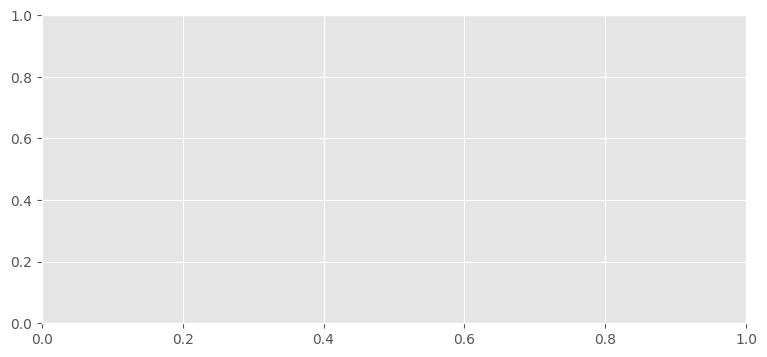

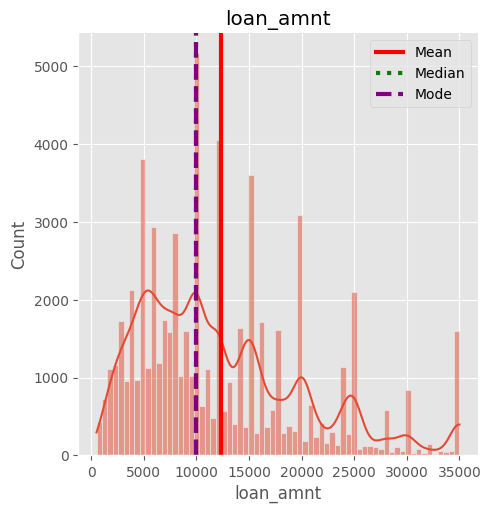

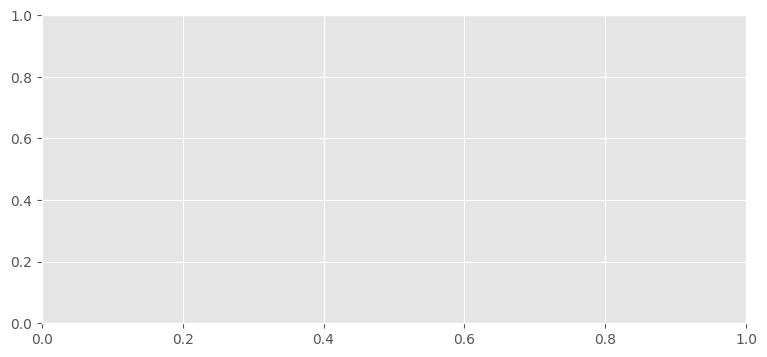

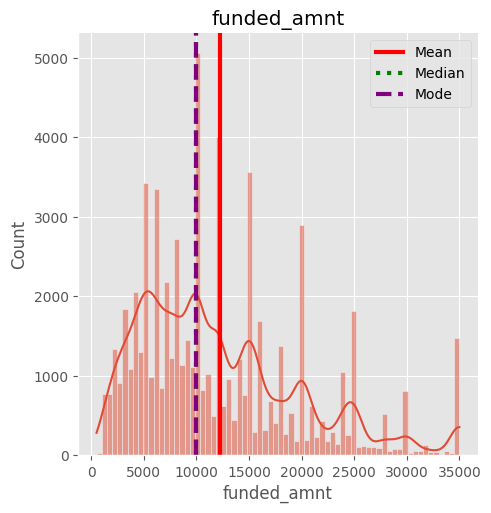

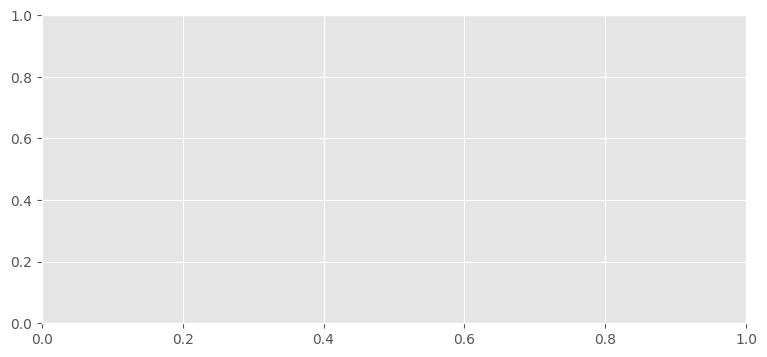

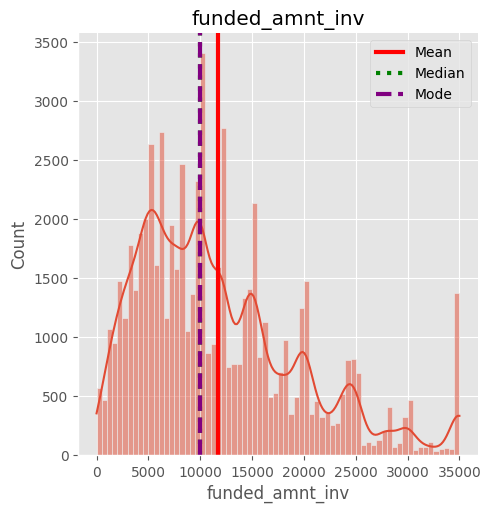

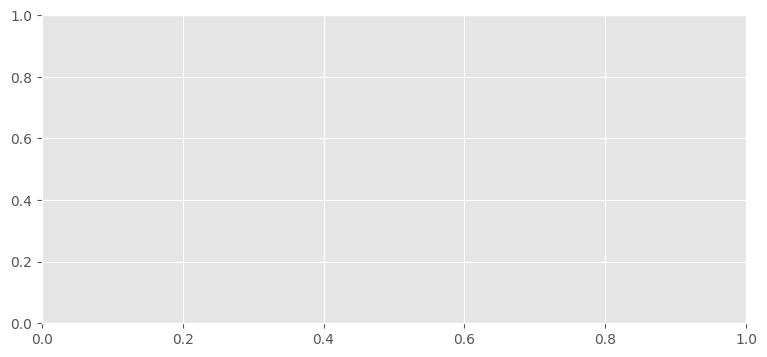

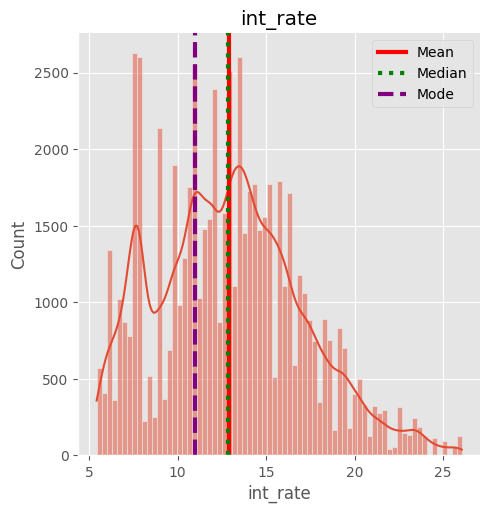

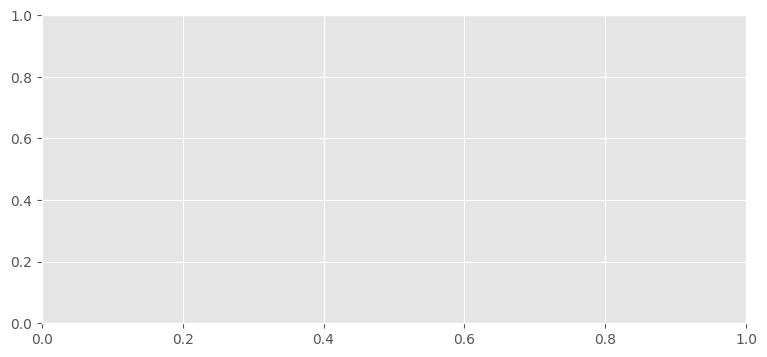

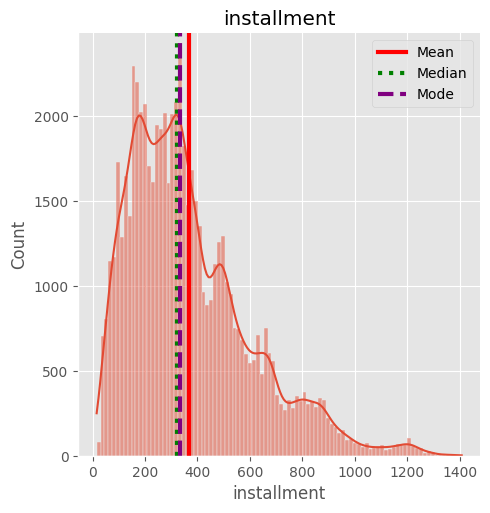

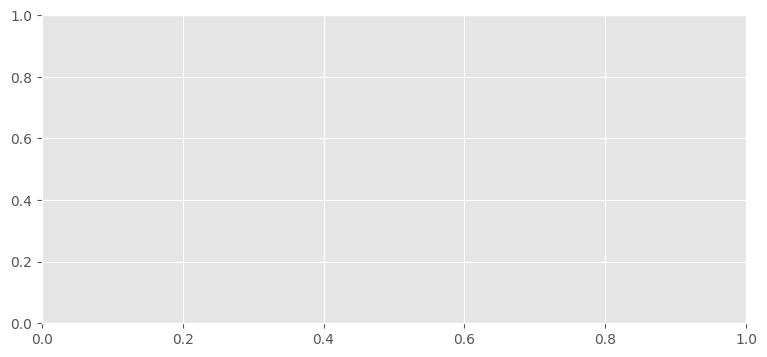

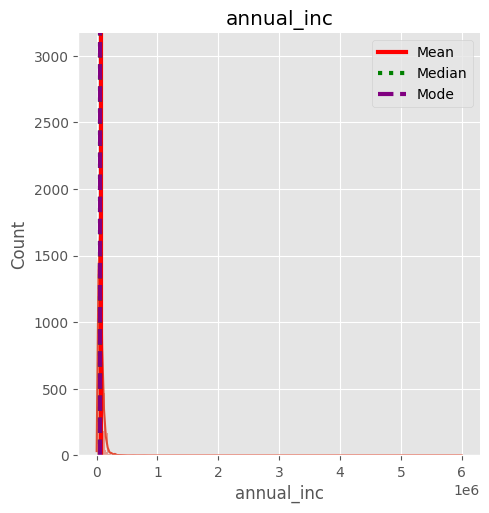

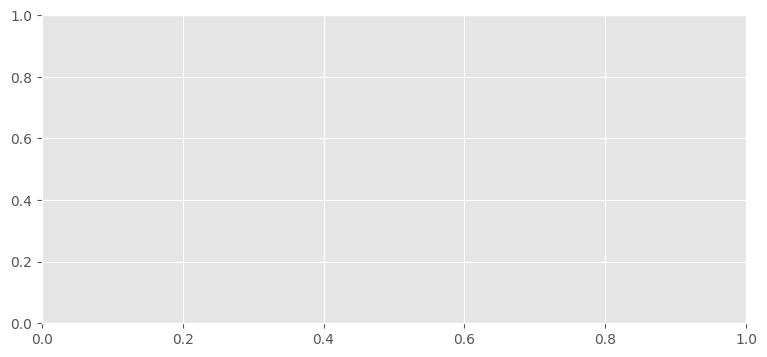

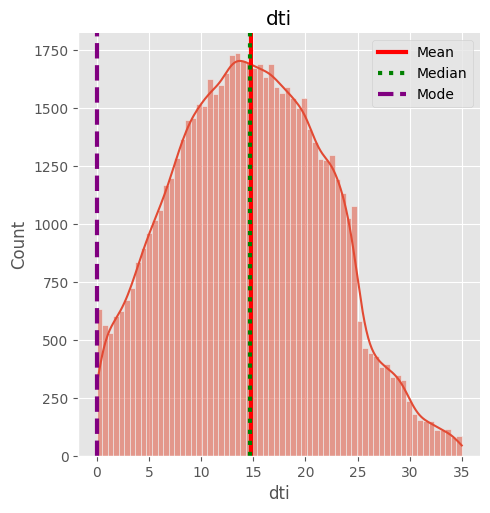

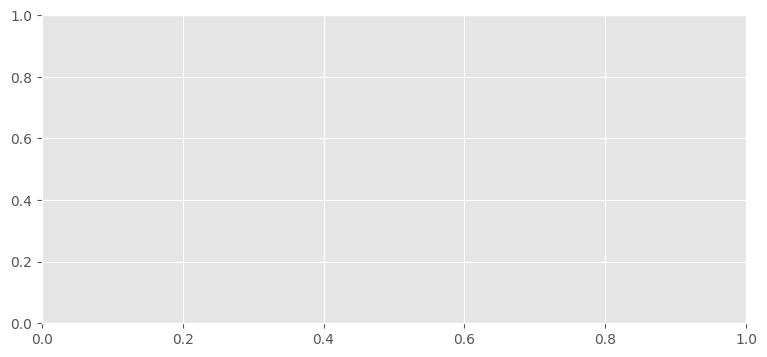

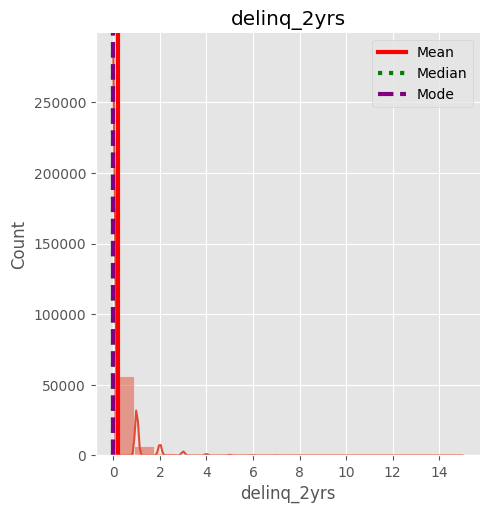

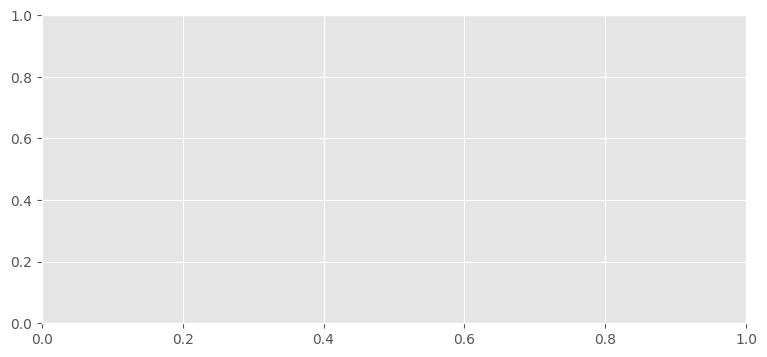

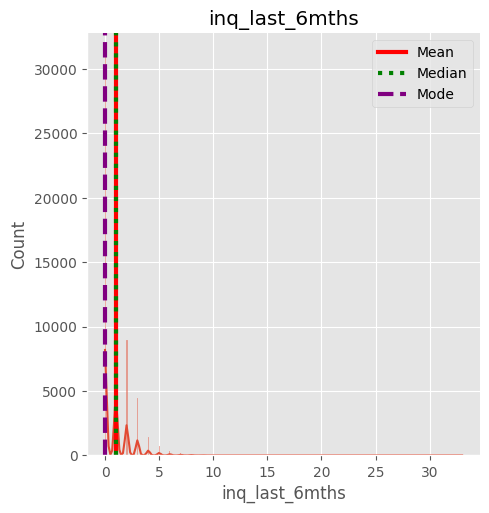

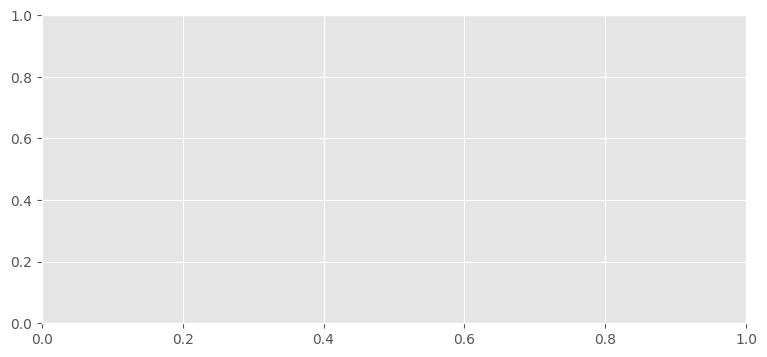

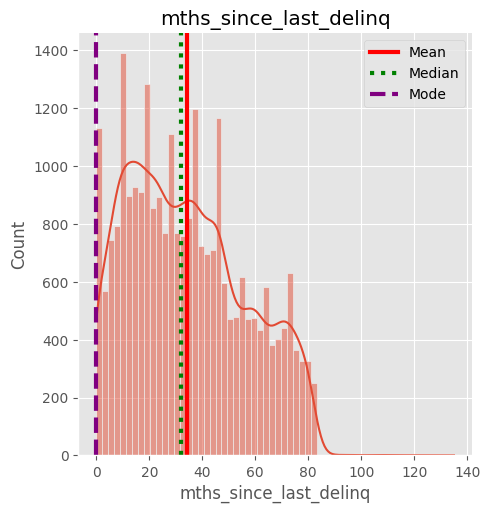

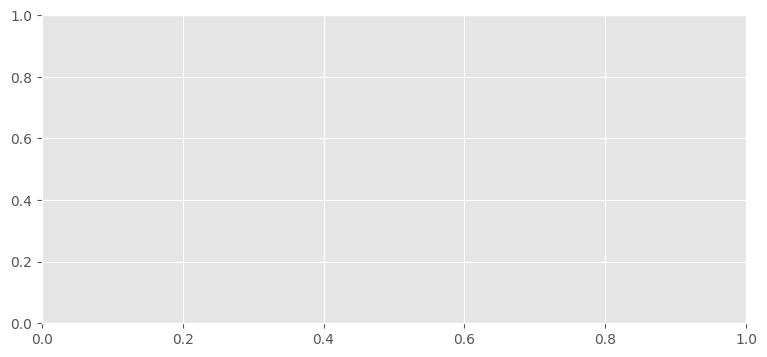

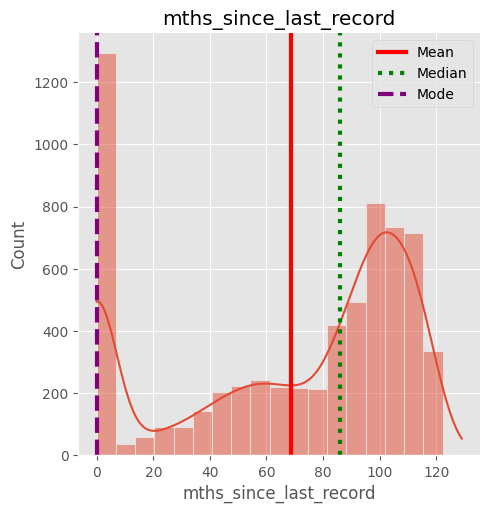

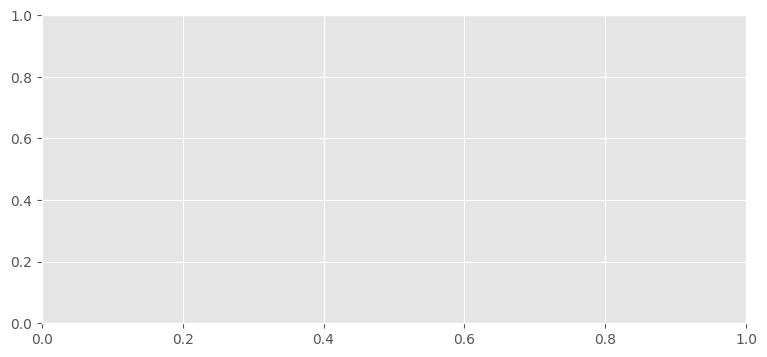

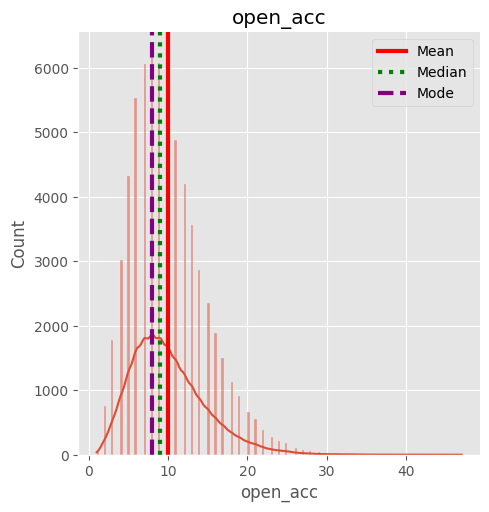

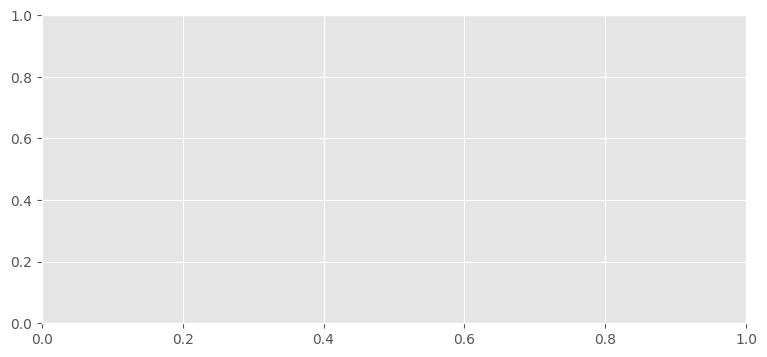

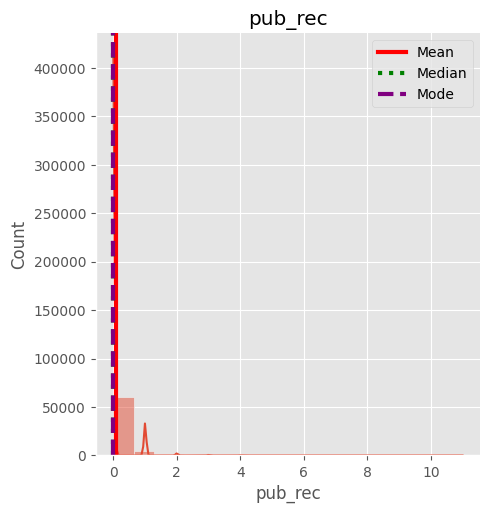

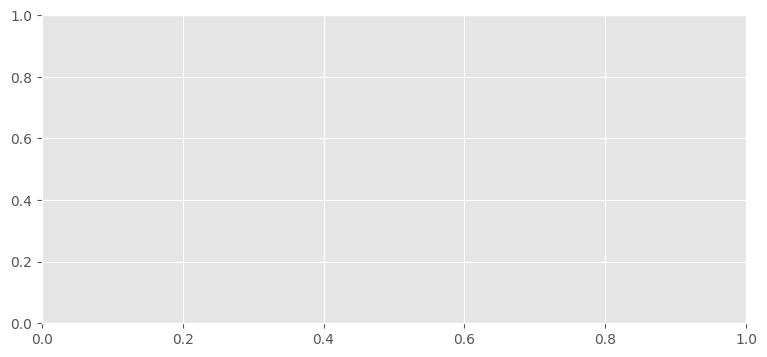

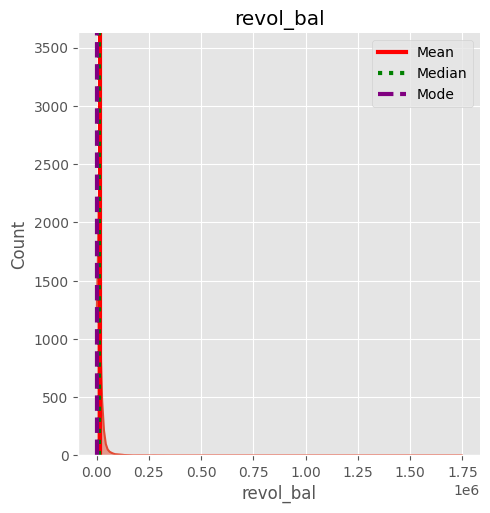

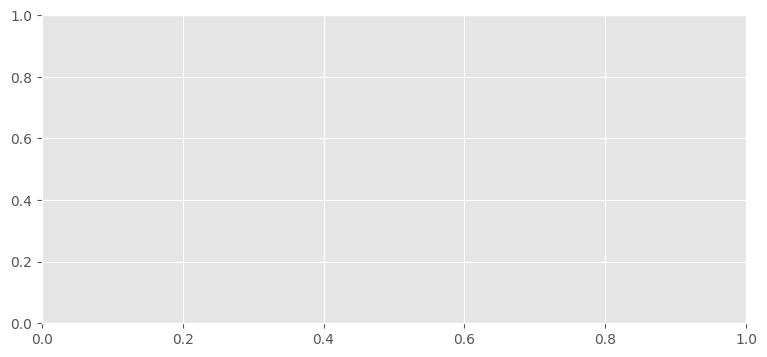

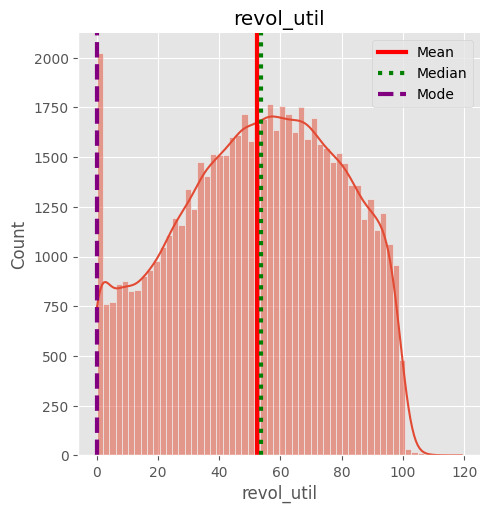

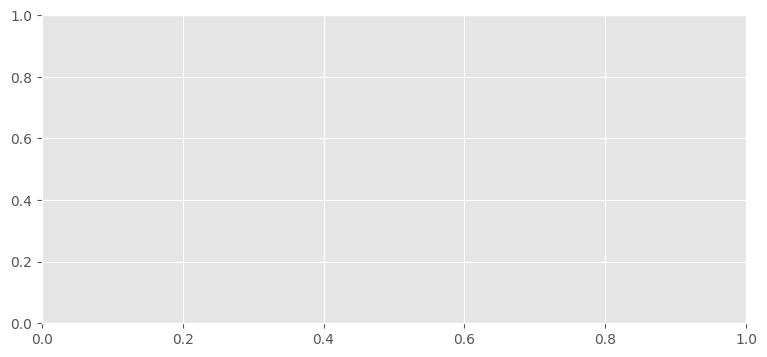

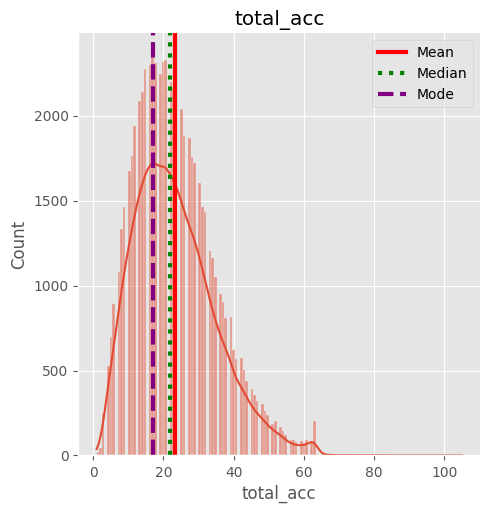

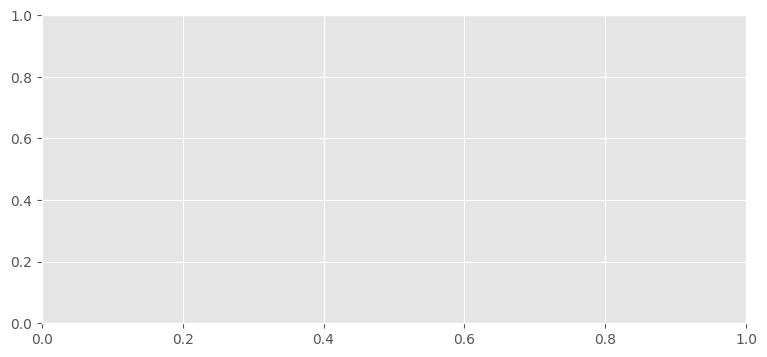

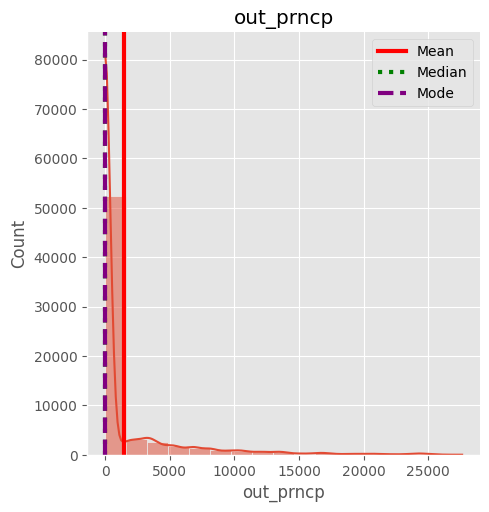

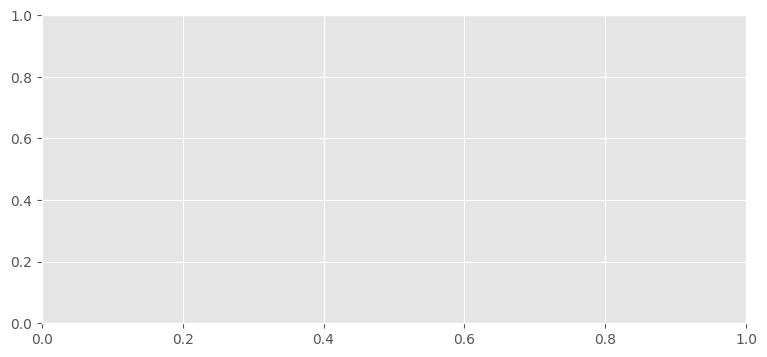

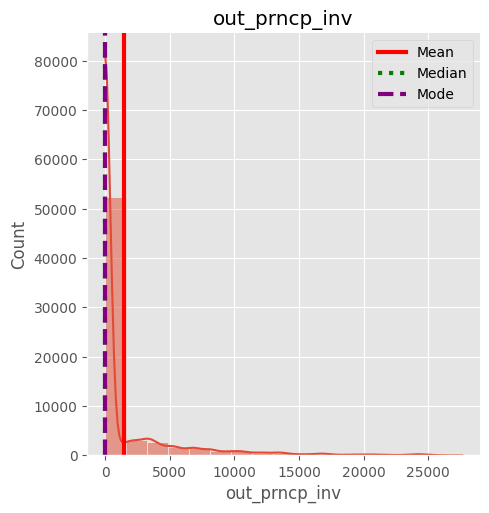

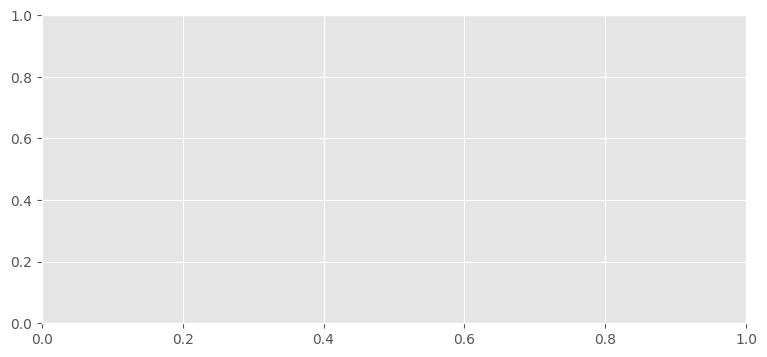

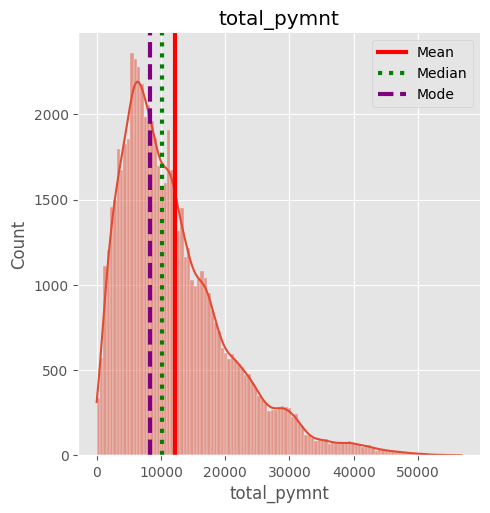

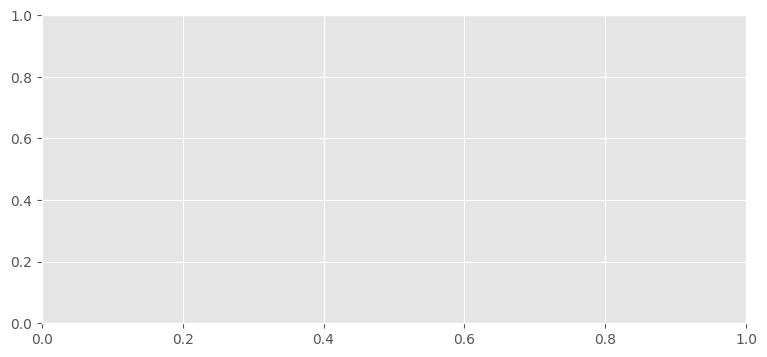

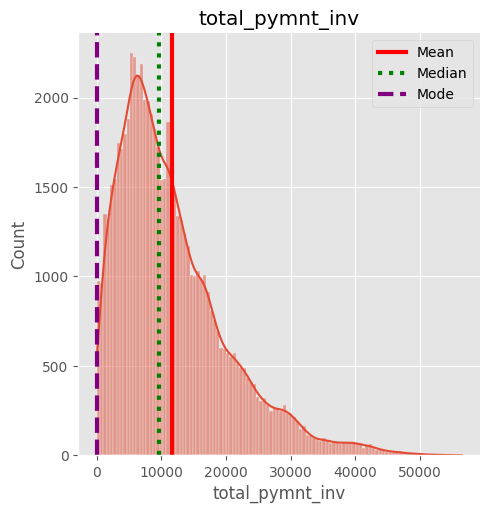

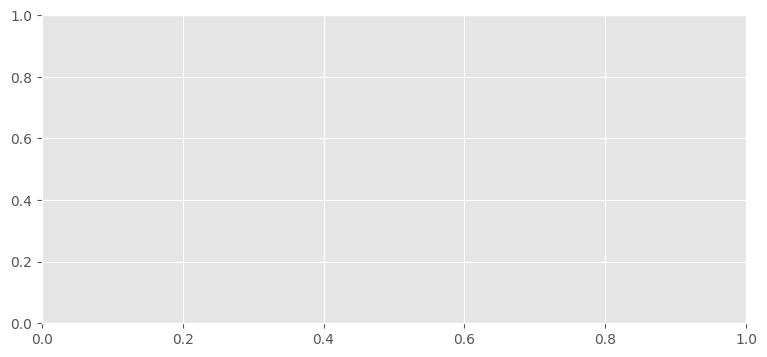

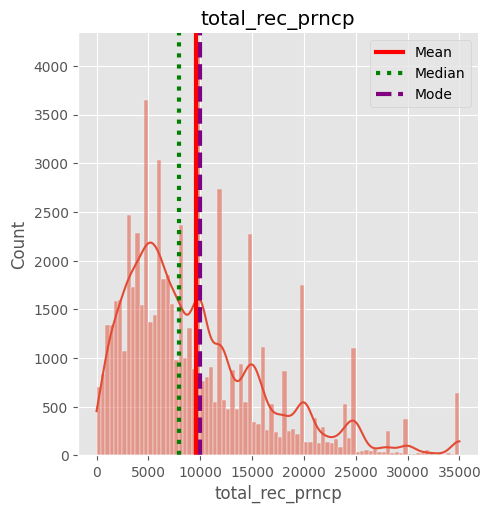

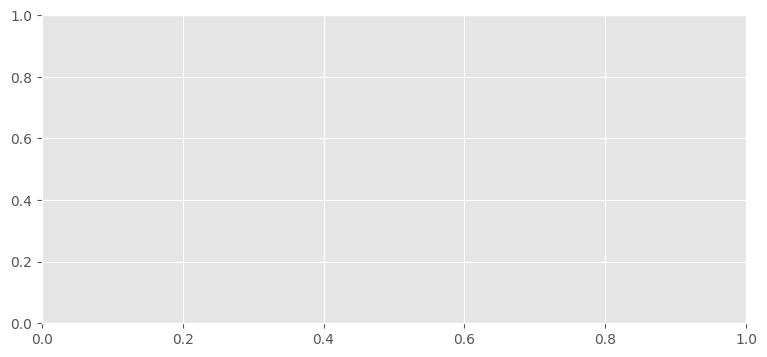

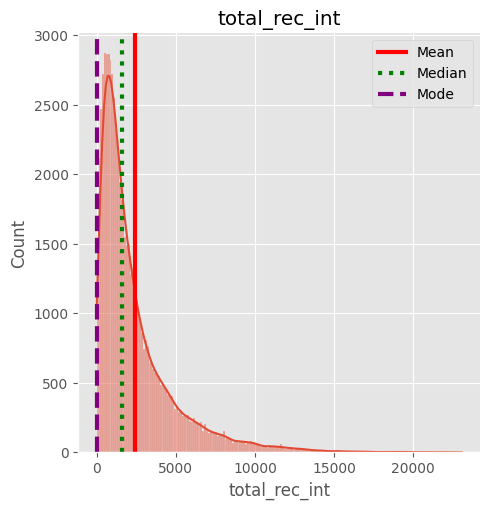

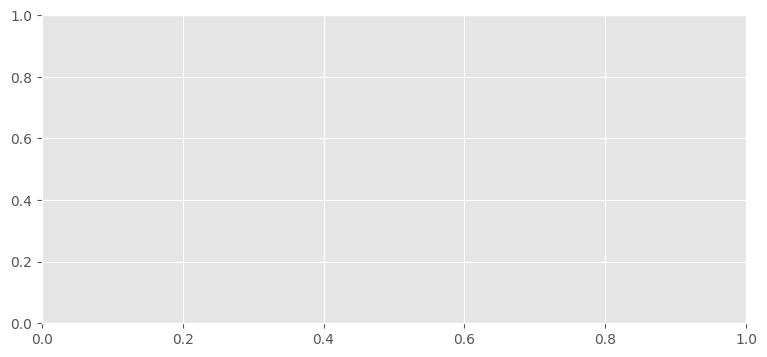

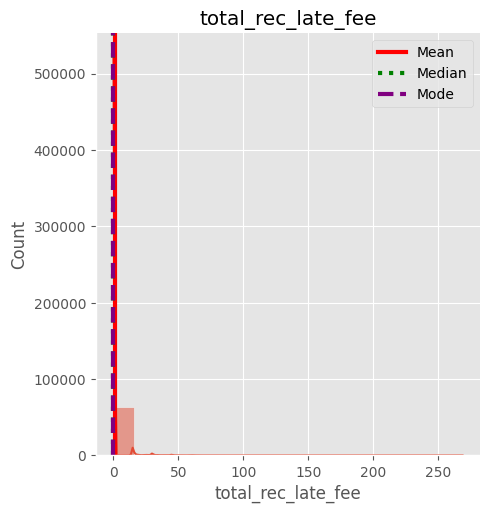

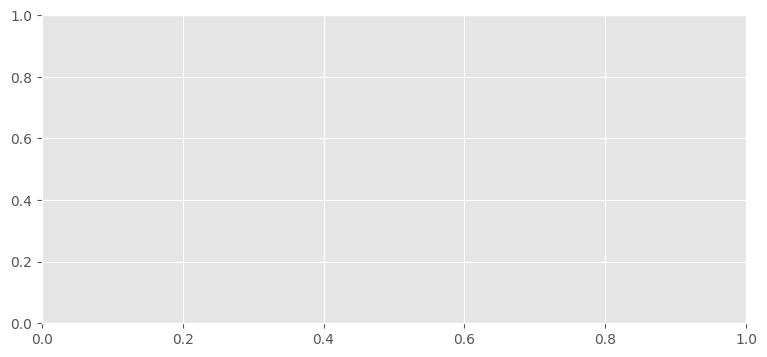

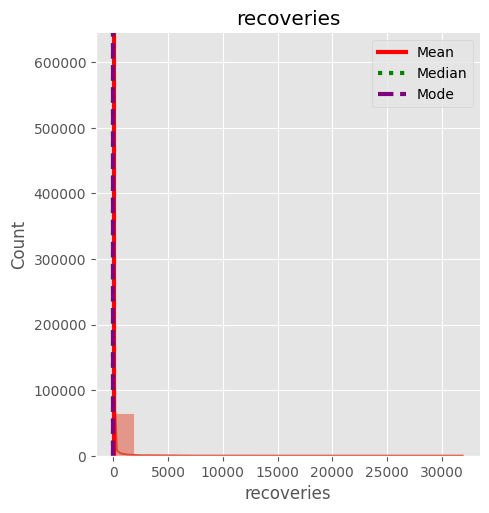

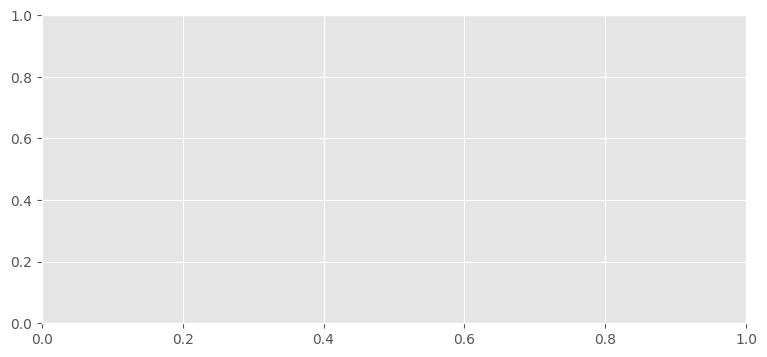

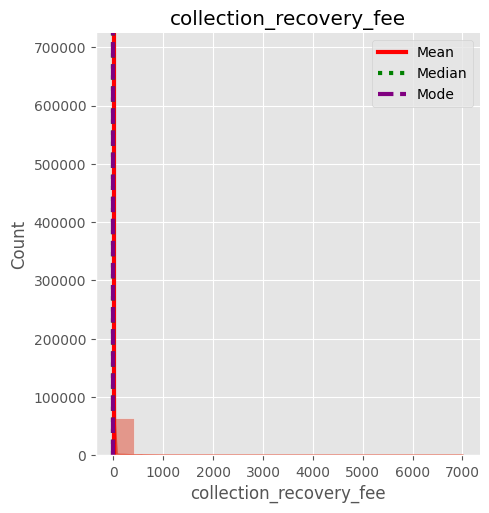

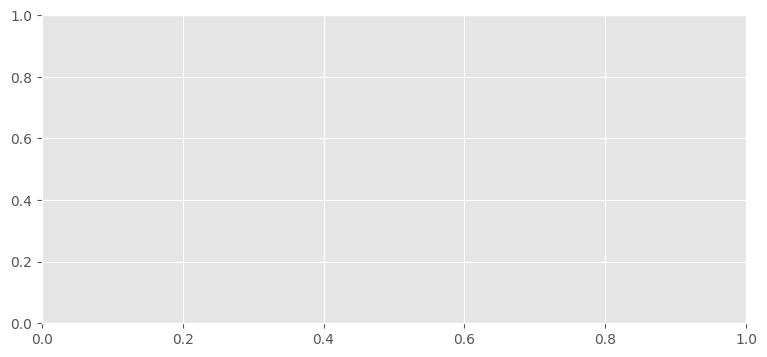

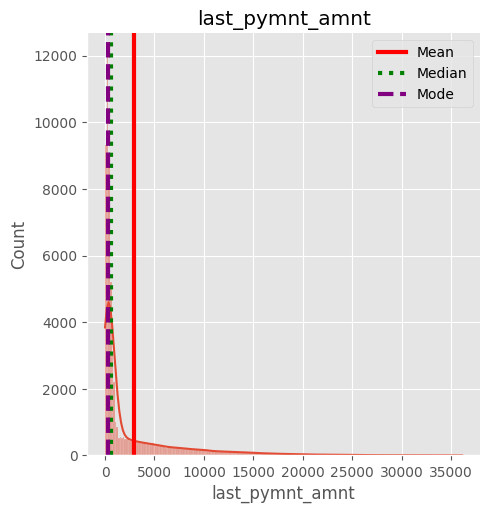

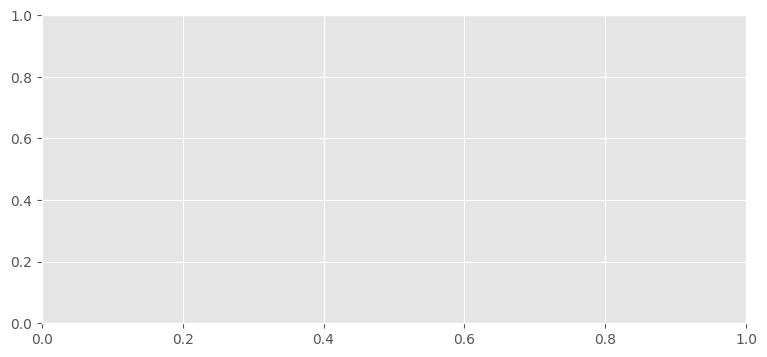

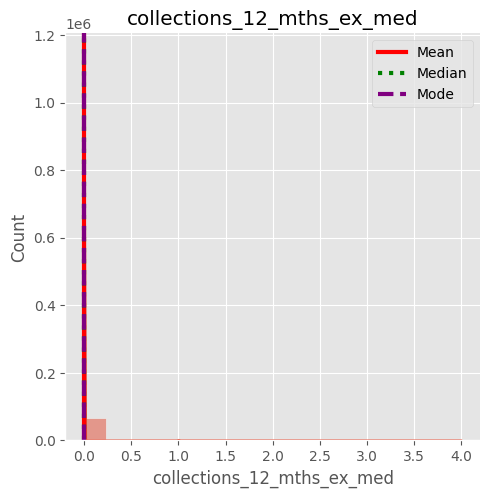

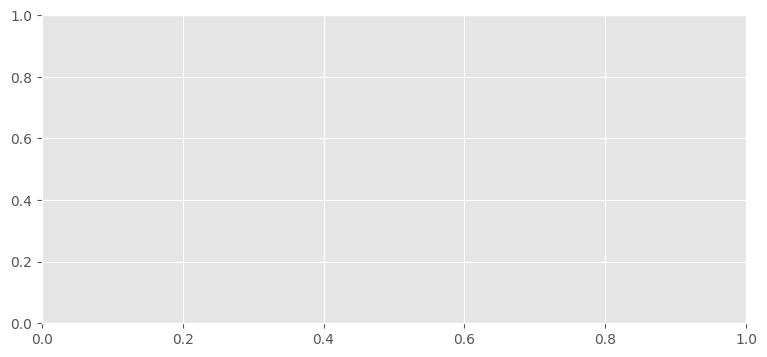

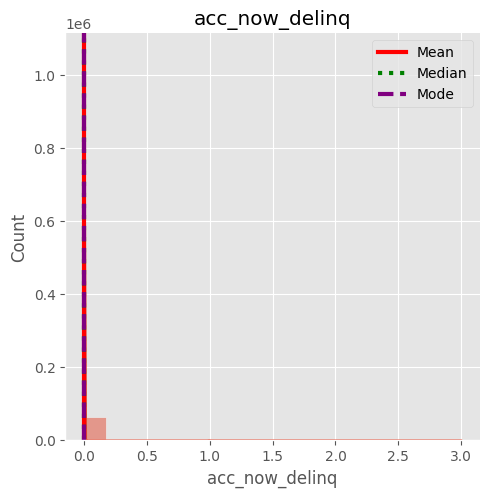

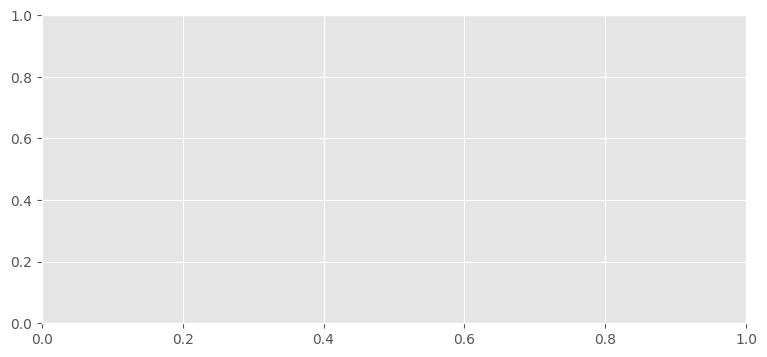

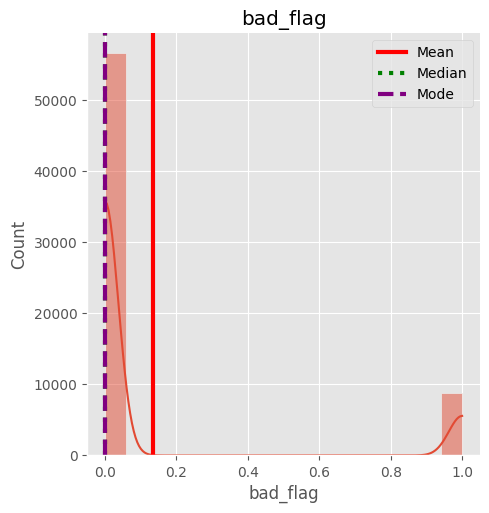

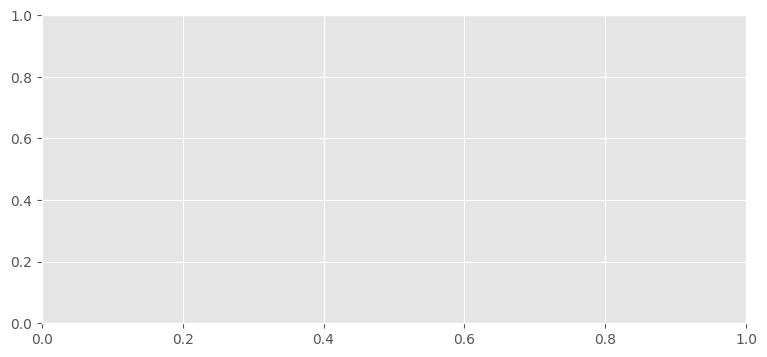

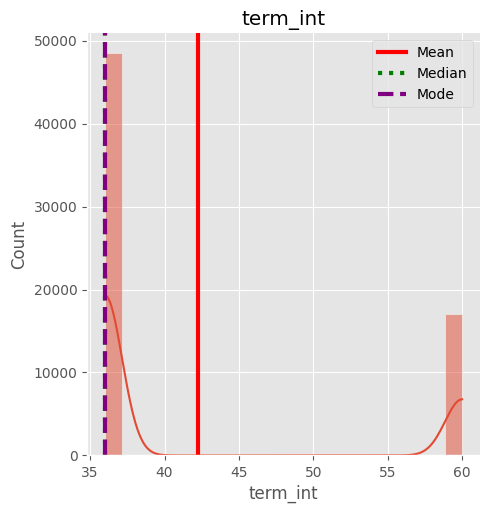

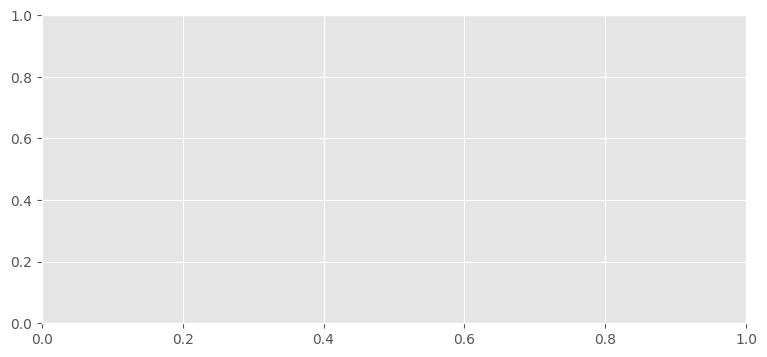

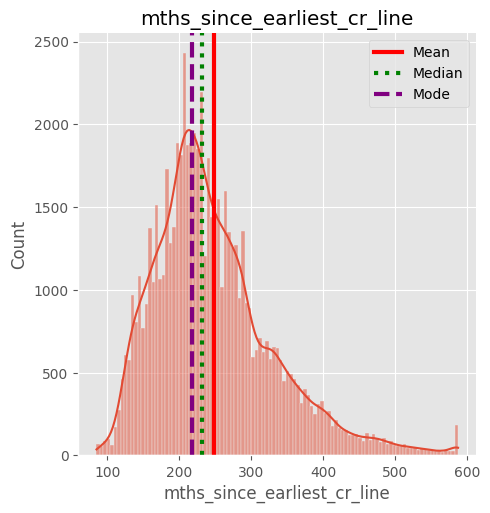

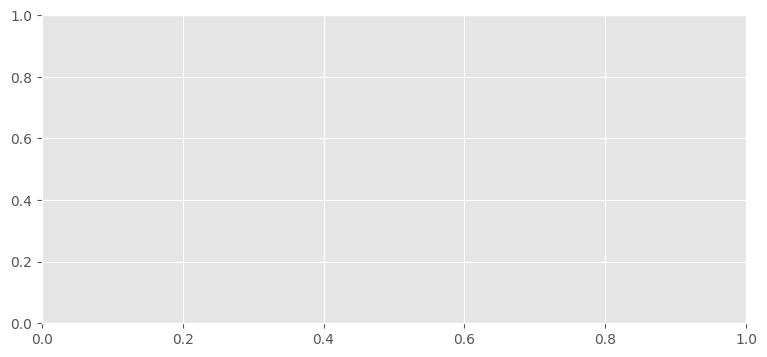

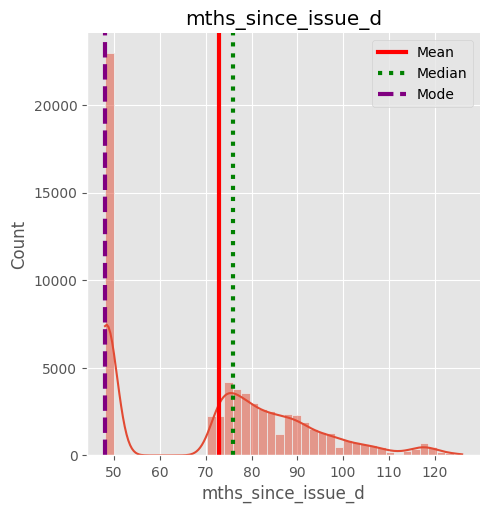

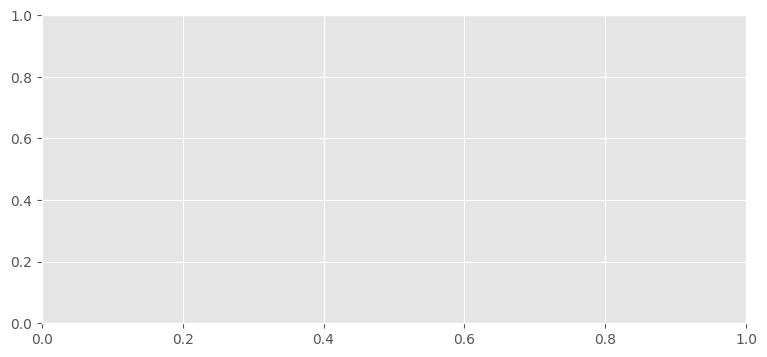

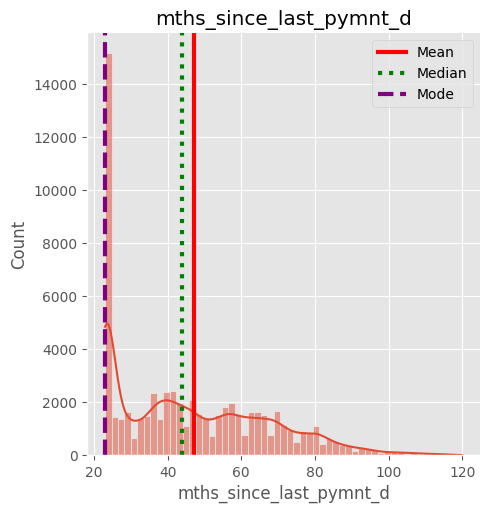

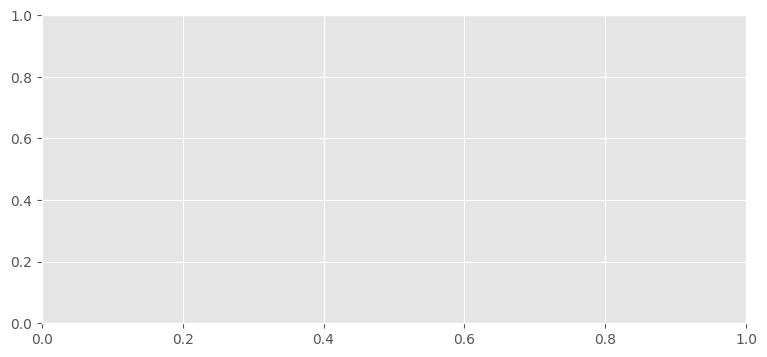

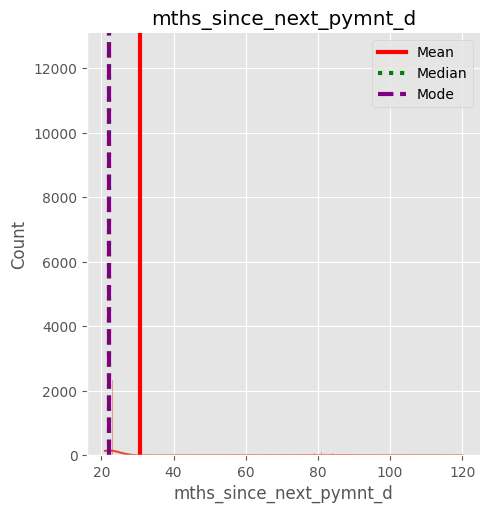

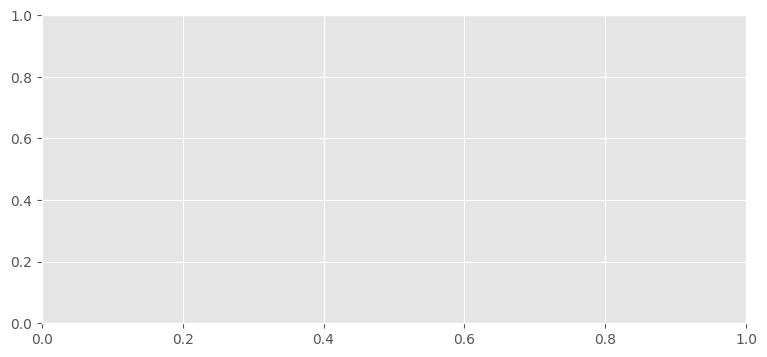

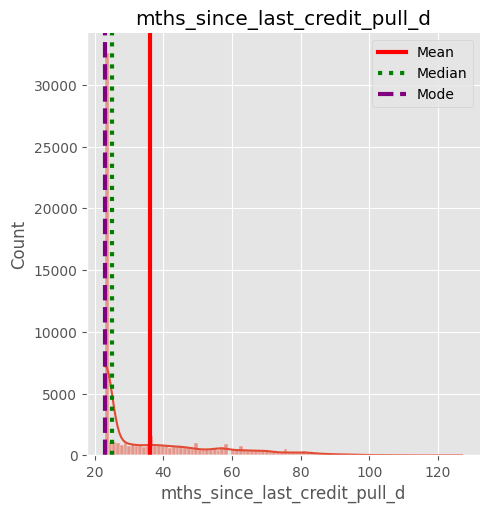

In [51]:
#plotting histogram
plt.style.use("ggplot")
for column in data.select_dtypes(include=np.number).columns.tolist():
  #menghitung statistik deskriptif
  average = data[column].mean()
  median = data[column].median()
  mode = data[column].mode()[0]
  std = data[column].std()

  #subplot
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  sns.displot(data[column], kde=True)

  # Changed 'Label' to 'label' for the axvline function calls
  plt.axvline(average, color='red', linestyle='solid', linewidth=3, label='Mean')
  plt.axvline(median, color='green', linestyle='dotted', linewidth=3, label='Median')
  plt.axvline(mode, color='purple', linestyle='dashed', linewidth=3, label='Mode')

  plt.title(column)
  plt.legend() # Add this line to display the legend

  #ringkasan statistik
  print('Ringkasan statistik dari {column}'.format(column=column))
  print('Rata-rata: ', "%.2f" % average)
  print('Standar deviasi: ', "%.2f" % std)
  print('Median: ', "%.2f" % median)
  print('Mode: ', "%.2f" % mode)

Caterogical Data

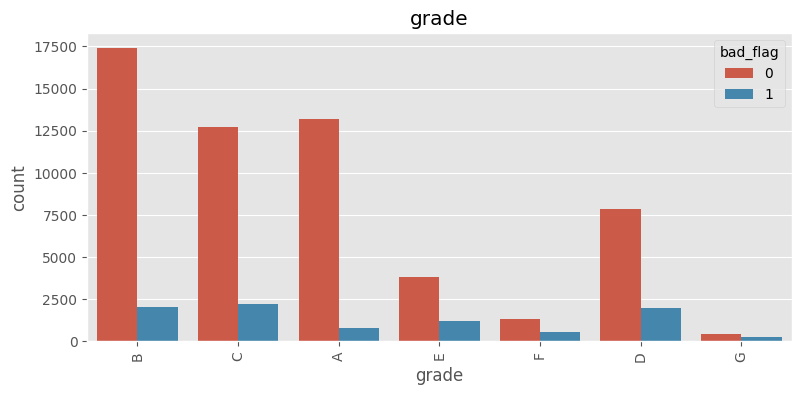

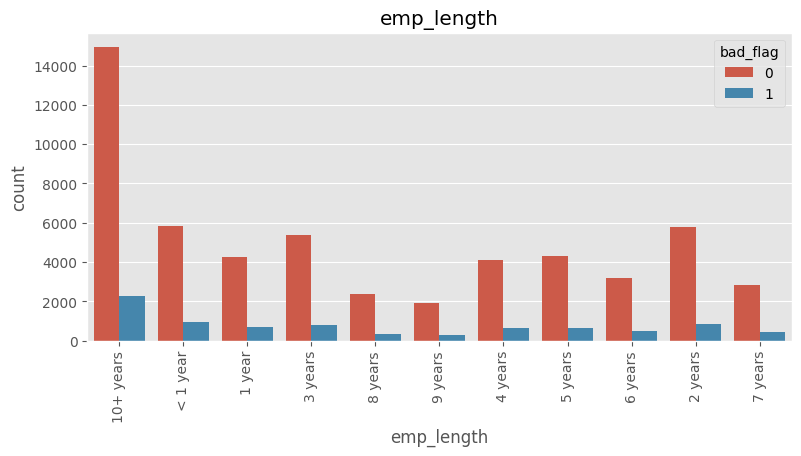

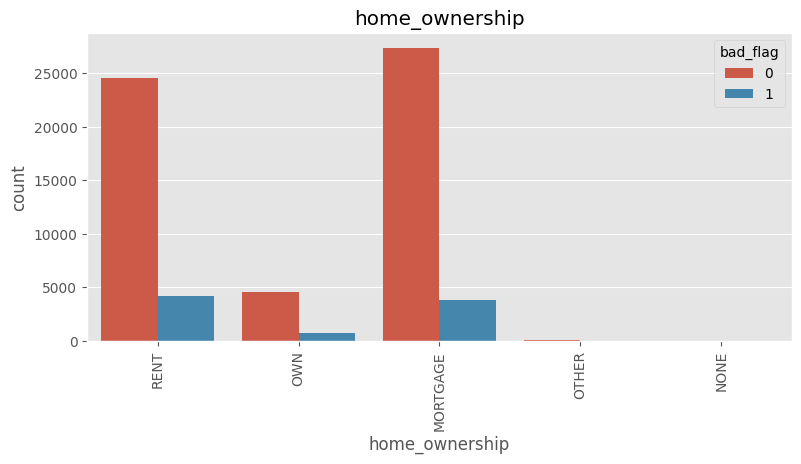

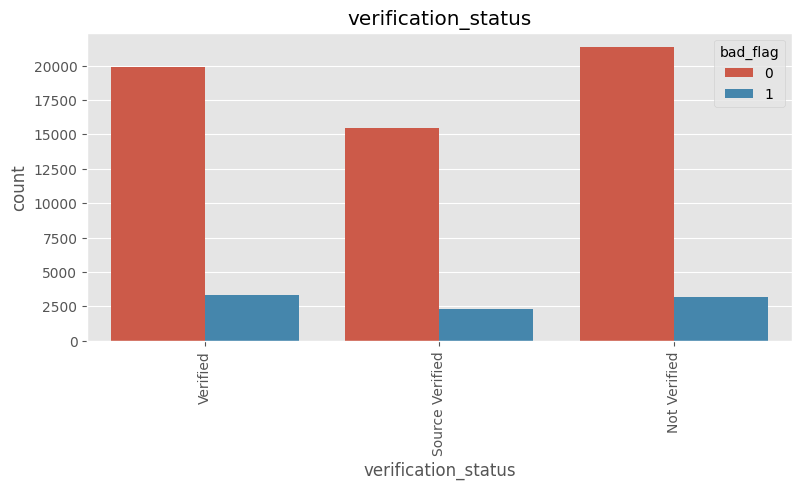

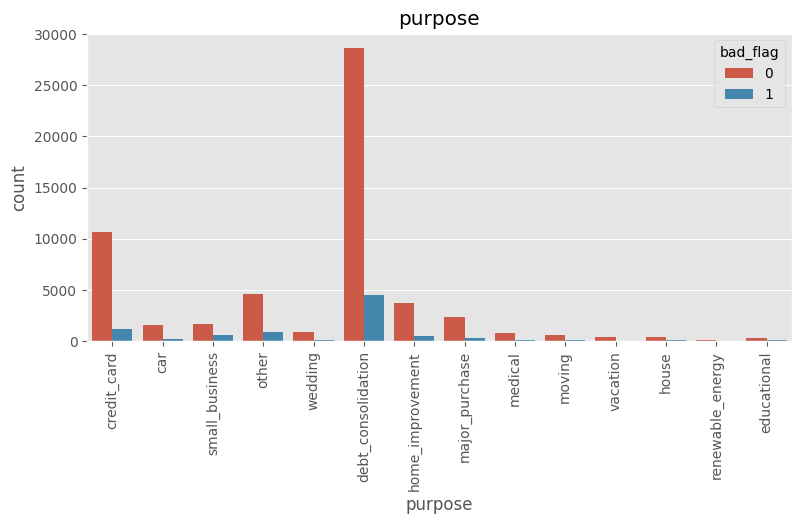

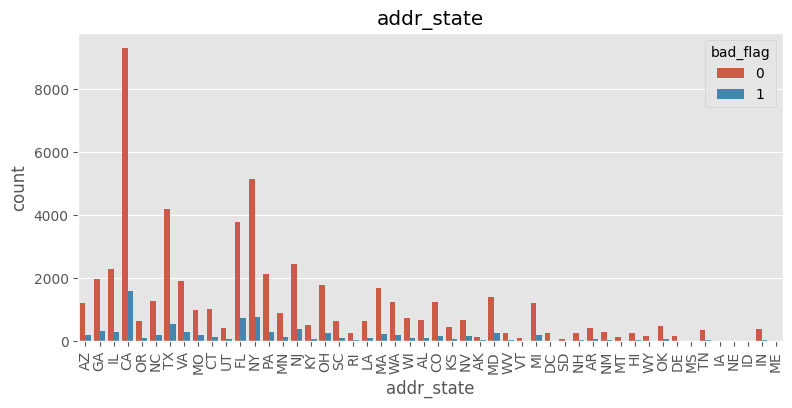

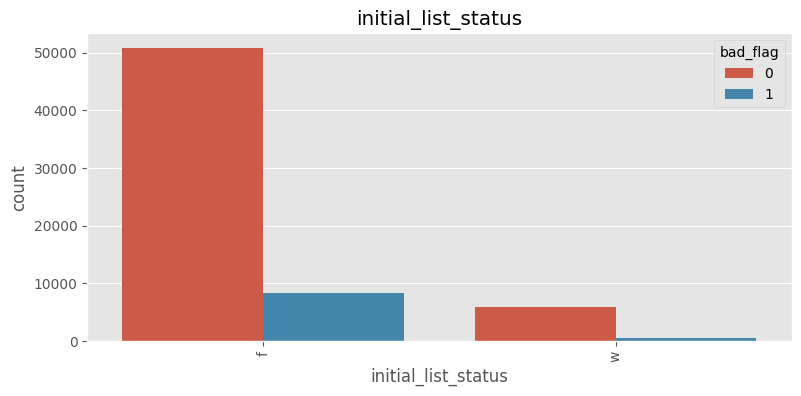

In [52]:
plt.style.use("ggplot")
for column in cat_var:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  sns.countplot(x = data[column], hue=data["bad_flag"])
  plt.title(column)
  plt.xticks(rotation=90)

# **Data Prepocessing**

**Check Misiing Value**

In [53]:
#persentase nilai yang hilang untuk setiap fitur
check_missing = data.isnull().sum()*100/ data.shape[0]

#fitur yang hanya memiliki missing value
missing_values = check_missing[check_missing>0].sort_values(ascending=False)

print("Persentasi nilai yang hilang untuk setiap fitur")
print(missing_values)

Persentasi nilai yang hilang untuk setiap fitur
mths_since_last_record           90.012216
mths_since_next_pymnt_d          73.186746
mths_since_last_delinq           59.706825
emp_length                        3.301267
collections_12_mths_ex_med        0.221408
revol_util                        0.155749
mths_since_last_pymnt_d           0.138953
acc_now_delinq                    0.045809
delinq_2yrs                       0.044282
inq_last_6mths                    0.044282
open_acc                          0.044282
pub_rec                           0.044282
total_acc                         0.044282
mths_since_earliest_cr_line       0.044282
annual_inc                        0.006108
mths_since_last_credit_pull_d     0.006108
dtype: float64


In [54]:
data.drop('mths_since_last_record', axis=1, inplace=True)

**Data Imputation**

In [57]:
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)


**Label Encoding**

In [59]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in cat_var:
  # Check if the column has mixed types
  if data[column].apply(type).nunique() > 1:
    # If mixed types, convert all to strings
    data[column] = data[column].astype(str)
  data[column] = label.fit_transform(data[column]) # Apply Label Encoding after ensuring uniform type

In [60]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,bad_flag,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,1,2,4,24000.0,2,...,171.62,0.0,0.0,0,36.0,395.0,72.0,35.0,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,2,11,4,30000.0,1,...,119.66,0.0,0.0,1,60.0,224.0,72.0,56.0,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,2,2,4,12252.0,0,...,649.91,0.0,0.0,0,36.0,193.0,72.0,42.0,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,2,2,4,49200.0,1,...,357.48,0.0,0.0,0,36.0,262.0,72.0,35.0,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,1,1,4,80000.0,1,...,67.79,0.0,0.0,0,60.0,263.0,72.0,23.0,22.0,23.0


**Handling Imbalanced Data**

In [61]:
from imblearn.over_sampling import SMOTE

# Proceed with separating features (X) and target (y)
X = data.drop('bad_flag', axis=1)
y = data['bad_flag']

# Create an instance of SMOTE for oversampling
oversampling = SMOTE(random_state=12, sampling_strategy=1)

In [63]:
# Impute Missing Values (before oversampling)

# Check for missing values in the entire DataFrame and print only columns with NaNs
missing_values = data.columns[data.isnull().any()].tolist()

# Check columns with NaNs and print value_counts (remove print to assign to variable)
for col in missing_values:
  print(col)
  print(data[col].value_counts())

# Impute values in missing_values, choosing appropriate fill values based on the data type and characteristic of each column.
# Here, numerical columns might be filled with mean/median, or mode for categorical columns
# This is merely an example of general imputation, if you have imputer method preferences, use those here.

for column in missing_values:
  if pd.api.types.is_numeric_dtype(data[column]):
    # Impute with median or mean (choose accordingly for your data)
    data[column].fillna(data[column].median(), inplace=True)
  elif pd.api.types.is_categorical_dtype(data[column]) or pd.api.types.is_object_dtype(data[column]):
    # Impute with mode
    data[column].fillna(data[column].mode()[0], inplace=True)
  else:
    # Handle other data types, or apply different imputations (like for datetimes)
    pass

# After imputation, re-assign feature/target data
X = data.drop('bad_flag', axis=1)
y = data['bad_flag']

# Now, proceed with oversampling
X, y = oversampling.fit_resample(X, y)

mths_since_last_pymnt_d
mths_since_last_pymnt_d
23.0     10019
24.0      5149
36.0      1382
38.0      1375
40.0      1267
         ...  
114.0       20
117.0       18
119.0       11
118.0        8
120.0        2
Name: count, Length: 98, dtype: int64
mths_since_next_pymnt_d
mths_since_next_pymnt_d
22.0     12472
23.0      2347
81.0       107
80.0       101
82.0        91
         ...  
40.0         2
21.0         2
33.0         1
115.0        1
120.0        1
Name: count, Length: 100, dtype: int64
mths_since_last_credit_pull_d
mths_since_last_credit_pull_d
23.0     30957
24.0      1618
25.0      1109
26.0      1076
27.0      1040
         ...  
121.0        3
115.0        1
114.0        1
113.0        1
125.0        1
Name: count, Length: 103, dtype: int64


In [64]:
y.value_counts()

,count
bad_flag,
0,56671
1,56671


**Train Test Split**

In [65]:
from sklearn.model_selection import train_test_split

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print("Bentuk (shape) dari data pelatihan:", X_train.shape)
print("Bentuk (shape) dari data pengujian:", X_test.shape)

Bentuk (shape) dari data pelatihan: (90673, 40)
Bentuk (shape) dari data pengujian: (22669, 40)


**Standardization**

In [66]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform data pelatihan
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [67]:
X_train_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,1.253772,1.296449,1.316138,0.079470,1.702333,0.134832,1.461478,0.012612,2.428509,-1.069033,...,-0.193615,-0.448617,-0.052314,-0.035806,-0.707588,0.307066,1.094624,0.912533,3.209614,-0.802874
1,0.054189,0.077506,0.148922,-0.768954,0.219581,-0.623441,-0.832682,-1.090661,0.489832,-1.069033,...,-0.195551,2.069046,-0.052314,-0.035806,-0.707588,0.526821,-0.100392,0.443138,-0.262772,1.350673
2,-1.188773,-1.185517,-1.100694,-0.320498,-1.157250,-0.623441,0.478266,1.115885,0.129792,-1.069033,...,-0.195551,-0.205328,-0.052314,-0.035806,-0.707588,-0.999624,-0.049429,-0.267529,-0.262772,-0.802874
3,0.364930,0.393262,0.461326,0.700562,0.751638,1.651379,-0.504945,-1.090661,6.398181,-1.069033,...,-0.195551,0.819866,-0.052314,-0.035806,-0.707588,0.578130,0.918863,0.585271,-0.262772,-0.802874
4,1.381052,1.425783,1.482887,1.650680,1.098945,0.893106,-0.832682,-1.090661,-0.285639,1.368660,...,-0.195551,-0.311344,-0.052314,-0.035806,1.581753,-0.063233,-1.272535,-1.357218,-0.262772,-0.802874


# **Data Modelling**

Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [70]:
y_train_pred = logreg.predict(X_test_scaled)
y_test_pred = logreg.predict(X_test)

Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [73]:
y_train_pred = dt_model.predict(X_test_scaled)
y_test_pred = dt_model.predict(X_test)

Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [75]:
y_train_pred = rf_model.predict(X_test_scaled)
y_test_pred = rf_model.predict(X_test)

# **Evaluation**

**ROC-AUC**

Training Model

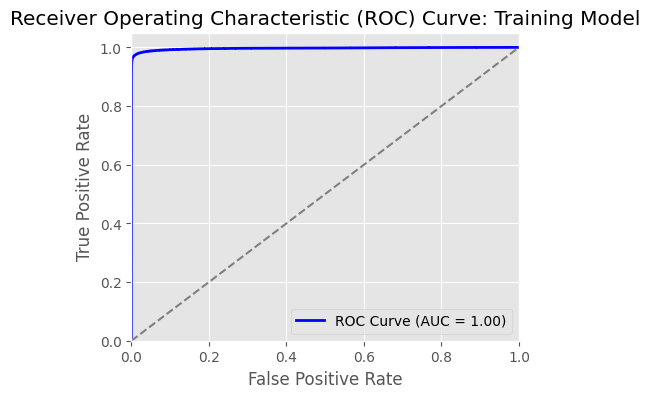

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_prob = logreg.predict_proba(X_train_scaled)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Plot the ROC curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve: Training Model')
plt.legend(loc='lower right')
plt.show()


DecisionTreeClassifier

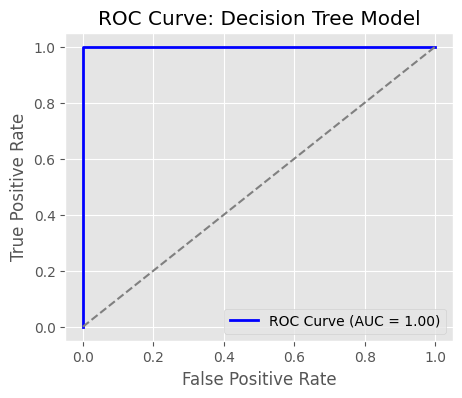

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Predict probabilities for ROC curve
y_prob = dt_model.predict_proba(X_train_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Plot ROC Curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Decision Tree Model')
plt.legend(loc='lower right')
plt.show()


Random Forest model

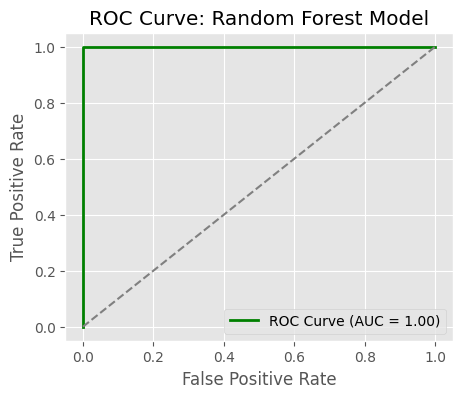

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Predict probabilities for ROC curve
y_prob = rf_model.predict_proba(X_train_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Plot ROC Curve
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest Model')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11183
           1       0.99      0.99      0.99     11486

    accuracy                           0.99     22669
   macro avg       0.99      0.99      0.99     22669
weighted avg       0.99      0.99      0.99     22669



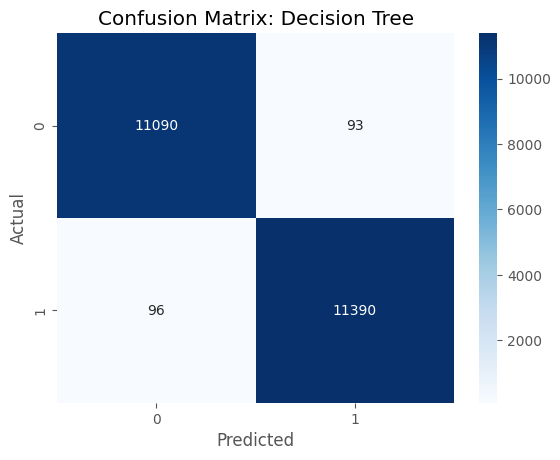

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = dt_model.predict(X_test_scaled)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Metrik lainnya
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Decision Tree')
plt.show()


Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11183
           1       1.00      0.96      0.98     11486

    accuracy                           0.98     22669
   macro avg       0.98      0.98      0.98     22669
weighted avg       0.98      0.98      0.98     22669



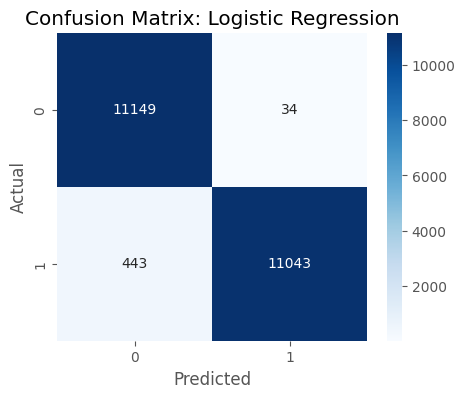

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = logreg_model.predict(X_test_scaled)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Metrik lainnya
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()


Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11183
           1       1.00      0.99      1.00     11486

    accuracy                           1.00     22669
   macro avg       1.00      1.00      1.00     22669
weighted avg       1.00      1.00      1.00     22669



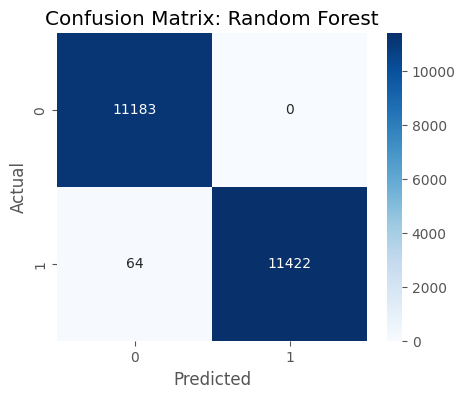

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = rf_model.predict(X_test_scaled)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Metrik lainnya
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()
